# Assignment: Xarray Groupby


Here will will calculate the NINO 3.4 index of El Nino variabillity 

This page from NOAA tells you a bit about the NINO 3.4 index [this page from NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst). It tells you the following.

- The Nino 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
- Warm or cold phases of the Oceanic Nino Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above (below) the threshold of +0.5°C (-0.5°C). This is known as the Oceanic Niño Index (ONI).

(Note that "anomaly" means that the seasonal cycle is removed.)


###  Reproduce the SST curve from the figure below

Use the NOAA ERSST v5 data  we worked with in class. (The OPeNDAP url is <'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'>.)

You don't have to match the stylistic details, just the "3mth running mean" curve.

### credit 

This lesson is from  Abernathy's book: (https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html). 



![enso](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

# load in your dataset

In [19]:
# do our imports

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

url=('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc')


noaa=xr.open_dataset(url)
noaa

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2036, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-09-03
    DODS_EXTRA.Unlimited_Dimension:  time

# Select just the NINO 3.4 region defined above
create a `nino_ds`

select only 1950 to 2020

note: when you select the lats, the order is backwards, so use `(5,-5)`

note2: the lats here are in degrees east, and the nino3.4 region def is in degrees W. to convert you need to take 360-170, and 360-120, i.e. (190, 240)

In [48]:
nino_ds = noaa.sel(time = slice('1950','2020'), lat = slice('5','-5'), lon = slice('190','240'))
nino_ds



<xarray.Dataset>
Dimensions:    (lat: 25, lon: 25, time: 852, nbnds: 2)
Coordinates:
  * lat        (lat) float32 48.0 46.0 44.0 42.0 40.0 ... 8.0 6.0 4.0 2.0 0.0
  * lon        (lon) float32 190.0 192.0 194.0 196.0 ... 232.0 234.0 236.0 238.0
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-09-03
    DODS_EXTRA.Unlimited_Dimension:  time

# create anomalies by removing the monthly mean

check the code in the `03_xarray_netcdf` notebook for a reminder how to remove the monthly mean. hint: it involves `groupby`

create a `nino_ds_anom` variable for your anomalies

In [49]:
gb = noaa.groupby('time.month')
noaa_mm = gb.mean(dim='time')
noaa_mm



<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, month: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (month, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36
    sst        (month, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-09-03
    DODS_EXTRA.Unlimited_Dimension:  time

In [50]:
nino_ds_anom = gb - gb.mean(dim= 'time')
nino_ds_anom

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2036, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-08-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sst        (time, lat, lon) float32 -1.192e-07 -1.192e-07 ... nan nan

# plot the timeseries of the regional anomaly
average over the lat and lon range of the NINO3.4 region
plot the resulting timeseries


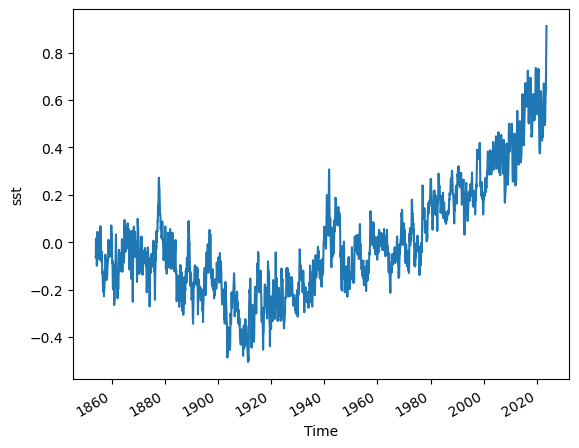

In [52]:


nino_ds_anom.sst.mean(dim = ('lat', 'lon')).plot()

# get a 3 month rolling mean

xarray has a function called 'rolling' that allows you to take a rolling mean. it takes arguments indicating which dim to take the mean over, and how many steps to include in the window. 

The following code woudl take a 12 month rolling mean of our dataset.

```python
ds_rolling = ds.rolling(time=12, center=True).mean()
ds_rolling
```


the NINO3.4 index is a 3 month rolling mean of the anomalies. create that an plot. compare your results to the official NOAA figure in the intro

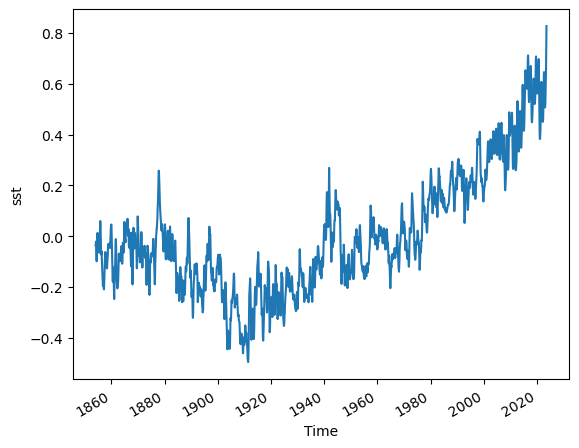

In [57]:
ds_rolling = nino_ds_anom.rolling(time=3, center=True).mean()
ds_rolling.sst.mean(dim = ('lat', 'lon')).plot()